# Tutorial (Inference and Visualization)

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from libs.inference import YoloInf
from libs.viz import BoxViz
from configs import ProjectPath, cfg


# Save some gpu memories
physical_devices = tf.config.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(device=physical_device, enable=True)

## Load a sample image

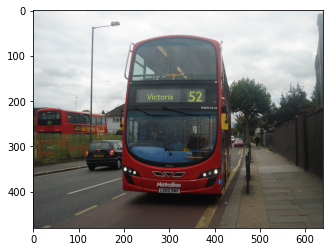

In [2]:
img_path = os.path.join(ProjectPath.PREVIEW_DIR.value, 'coco2017_val_550691.jpg')
img_arr = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(img_arr)

## Get YOLO to inference with checkpoint file

In [3]:
yolo_inf = YoloInf(ckpt_path=ProjectPath.COCO_PRETRAINED_CKPT_PATH.value)

## Get Predictions

In [4]:
preds = yolo_inf.get(img_arr=img_arr, conf_thr=0.3)
preds

[{'bbox': [238, 248, 288, 293],
  'confidence': 0.9181408882141113,
  'class_index': 1,
  'class_name': 'person'},
 {'bbox': [494, 280, 502, 302],
  'confidence': 0.7516905069351196,
  'class_index': 1,
  'class_name': 'person'},
 {'bbox': [115, 282, 199, 357],
  'confidence': 0.9988051652908325,
  'class_index': 3,
  'class_name': 'car'},
 {'bbox': [441, 283, 466, 303],
  'confidence': 0.9683821201324463,
  'class_index': 3,
  'class_name': 'car'},
 {'bbox': [436, 278, 444, 292],
  'confidence': 0.39926865696907043,
  'class_index': 3,
  'class_name': 'car'},
 {'bbox': [262, 274, 269, 284],
  'confidence': 0.3696157932281494,
  'class_index': 28,
  'class_name': 'tie'},
 {'bbox': [189, 65, 443, 399],
  'confidence': 0.9998866319656372,
  'class_index': 6,
  'class_name': 'bus'},
 {'bbox': [6, 212, 161, 327],
  'confidence': 0.981164276599884,
  'class_index': 6,
  'class_name': 'bus'}]

## Visualization

In [5]:
viz = BoxViz(img_arr=img_arr, preds=preds)
viz_result = viz.get(color='random', thickness=1, show_score=True, font_scale=0.5)

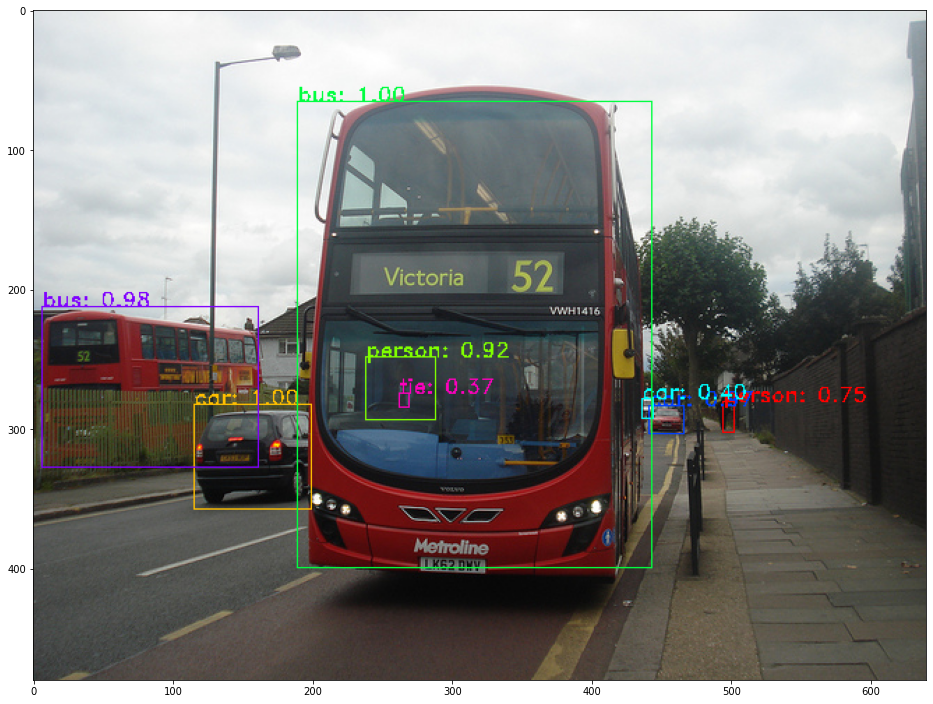

In [6]:
fig, ax = plt.subplots(figsize=(16, 24))
ax.imshow(viz_result)